In [1]:
%load_ext gvmagic

In [2]:
import discoursegraphs as dg

In [3]:
ptb_str = """(S (NP (NNP John)) (VP (VBD hated) (NP (PRP himself))) (. .))"""

In [4]:
pdg_noprec = dg.read_ptb.fromstring(ptb_str, precedence=False)
pdg_prec = dg.read_ptb.fromstring(ptb_str, precedence=True)

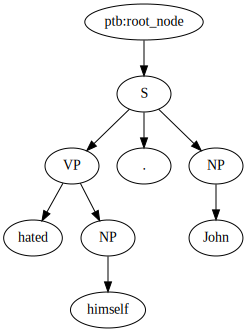

In [5]:
%dotstr dg.print_dot(pdg_noprec)

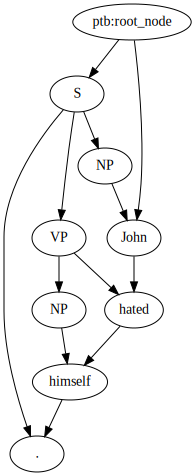

In [6]:
%dotstr dg.print_dot(pdg_prec)

In [7]:
pdg_prec.tokens

[3, 6, 9, 11]

In [8]:
pdg_prec.add_offsets()

In [9]:
pdg_prec.node

OrderedDict([(0, {'label': 'ptb:root_node', 'layers': {'ptb'}}),
             (1, {'label': u'S', 'layers': {'ptb'}}),
             (2, {'label': u'NP', 'layers': {'ptb'}}),
             (3,
              {'label': 'John',
               'layers': {'ptb'},
               'ptb:offset': 4,
               'ptb:onset': 0,
               'ptb:pos': u'NNP',
               'ptb:token': 'John'}),
             (5,
              {'label': u'VP',
               'layers': {'ptb', 'ptb:syntax'},
               'ptb:cat': u'VP'}),
             (6,
              {'label': 'hated',
               'layers': {'ptb'},
               'ptb:offset': 10,
               'ptb:onset': 5,
               'ptb:pos': u'VBD',
               'ptb:token': 'hated'}),
             (8, {'label': u'NP', 'layers': {'ptb'}}),
             (9,
              {'label': 'himself',
               'layers': {'ptb'},
               'ptb:offset': 18,
               'ptb:onset': 11,
               'ptb:pos': u'PRP',
               '

In [10]:
[o for o in pdg_prec.get_offsets()]

[(3, 0, 4), (6, 5, 10), (9, 11, 18), (11, 19, 20)]

# add docgraph for coref / NER

In [11]:
cdg = dg.DiscourseDocumentGraph(namespace='coref+ner')

In [12]:
# cdg.add_node()

In [13]:
print cdg.root
print cdg.ns

coref+ner:root_node
coref+ner


In [14]:
# help(cdg.add_node)

In [15]:
# tokens
cdg.add_node('N3', attr_dict={cdg.ns+':token': 'John'})
cdg.add_node('N4', attr_dict={cdg.ns+':token': 'hated'})
cdg.add_node('N5', attr_dict={cdg.ns+':token': 'himself'})
cdg.add_node('N6', attr_dict={cdg.ns+':token': '.'})

In [16]:
# named entities
cdg.add_node(
    'N2', attr_dict={cdg.ns+':ner': 'PERSON'},
    layers={cdg.ns, cdg.ns+':ner'})
cdg.add_edge(
    'N2', 'N3',
    layers={cdg.ns, cdg.ns+':ner'},
    edge_type=dg.EdgeTypes.dominance_relation)

In [17]:
# coreference
cdg.add_edge('N5', 'N3',
             layers={cdg.ns, cdg.ns+':coreference'},
             edge_type=dg.EdgeTypes.pointing_relation)

In [18]:
# add document edges
cdg.add_edge(cdg.root, 'N2',
             edge_type=dg.EdgeTypes.dominance_relation) # PERSON
cdg.add_edge(cdg.root, 'N4',
             edge_type=dg.EdgeTypes.dominance_relation) # hated
cdg.add_edge(cdg.root, 'N5',
             edge_type=dg.EdgeTypes.dominance_relation) # himself
cdg.add_edge(cdg.root, 'N6',
             edge_type=dg.EdgeTypes.dominance_relation) # .

In [19]:
cdg.add_offsets()

In [20]:
cdg.node

OrderedDict([('coref+ner:root_node',
              {'layers': {'coref+ner'},
               'metadata': defaultdict(<function discoursegraphs.discoursegraph.<lambda>>,
                           {})}),
             ('N3', {'coref+ner:token': 'John', 'layers': {'coref+ner'}}),
             ('N4', {'coref+ner:token': 'hated', 'layers': {'coref+ner'}}),
             ('N5', {'coref+ner:token': 'himself', 'layers': {'coref+ner'}}),
             ('N6', {'coref+ner:token': '.', 'layers': {'coref+ner'}}),
             ('N2',
              {'coref+ner:ner': 'PERSON',
               'layers': {'coref+ner', 'coref+ner:ner'}})])

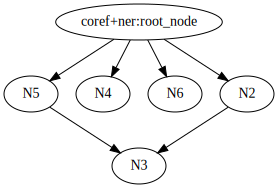

In [21]:
%dotstr dg.print_dot(cdg)

In [22]:
cdg.tokens

[]